## Week 3 - Lab - Logistic Regression

### Sentiment analysis

This contest is taken from the real task of Text Processing.

The task is to build a model that will determine the tone (positive, negative) of the text. To do this, you will need to train the model on the existing data (train.csv). The resulting model will have to determine the class (neutral, positive, negative) of new texts. The dataset contains the following fields:

| Field name | Meaning |
|------------|-----------|
| ItemID  | id of twit|
| Sentiment | sentiment (1-positive, 0-negative)|
| SentimentText | text of the twit|

Let's first of all have a look at the data

In [1]:
# Import pandas, numpy and the dataset, save it in a object called 'sentiment'
# Your code here
import pandas as pd
import numpy as np

sentiment = pd.read_csv('data/train.csv', encoding='latin-1')
# Let's check sentiment.head(10) and sample(10)
# Your code here
sentiment.head(10)

,ItemID,Sentiment,SentimentText
0,1,0,is so sad for my APL frie...
1,2,0,I missed the New Moon trail...
2,3,1,omg its already 7:30 :O
3,4,0,.. Omgaga. Im sooo im gunna CRy. I'...
4,5,0,i think mi bf is cheating on me!!! ...
5,6,0,or i just worry too much?
6,7,1,Juuuuuuuuuuuuuuuuussssst Chillin!!
7,8,0,Sunny Again Work Tomorrow :-| ...
8,9,1,handed in my uniform today . i miss you ...
9,10,1,hmmmm.... i wonder how she my number @-)


As we can see, the structure of a twit varies a lot between twit and twit. They have different lengths, letters, numbers, extrange characters, etc. 

It is also important to note that **a lot** of words are not correctly spelled, for example the word _"Juuuuuuuuuuuuuuuuussssst"_ or the word _"sooo"_

This makes it hard to mesure how positive or negative are the words within the twits.

So we need a way of scoring the words such that words that appear in positive twits have greater score that those that appear in negative twits.

But first... how do we represent the twits as vectors we can input to our algorithm?

### Bag of words

One thing we could do to represent the twits as equal-sized vectors of numbers is the following:

* Create a list (vocabulary) with all the unique words in the whole corpus of twits. 
* We construct a feature vector from each twit that contains the counts of how often each word occurs in the particular twit

_Note that since the unique words in each twit represent only a small subset of all the words in the bag-of-words vocabulary, the feature vectors will mostly consist of zeros_

Lets construct the bag of words. We will work with a smaller example for illustrative purposes, and at the end we will work with our real data.

In [2]:
twits = [
    'This is amazing!',
    'ML is the best, yes it is',
    'I am not sure about how this is going to end...'
]

Let's import [CountVectorizer.](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html) It'll help us to convert a collection of text documents to a matrix of token counts.

In [3]:
# Your code here
from sklearn.feature_extraction.text import CountVectorizer

# Define an object of CountVectorizer() fit and transfom your twits into a 'bag'
# Your code here
vectorizer = CountVectorizer()
bag = vectorizer.fit_transform(twits)

In [4]:
# Find in document of CountVectorizer a function that show us list of feature names
# Your code here
vectorizer.get_feature_names()

['about',
 'am',
 'amazing',
 'best',
 'end',
 'going',
 'how',
 'is',
 'it',
 'ml',
 'not',
 'sure',
 'the',
 'this',
 'to',
 'yes']

As we can see from executing the preceding command, the vocabulary is stored in a Python array that maps the unique words to integer indices. Next, let's print the feature vectors that we just created:

In [5]:
# Call toarray() on your 'bag' to see the feature vectors
# Your code here
bag.toarray()

array([[0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0],
       [0, 0, 0, 1, 0, 0, 0, 2, 1, 1, 0, 0, 1, 0, 0, 1],
       [1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0]], dtype=int64)

In [6]:
# What is the index of the word 'is' and how many times it occurs in all three twits?
# Your answer here
is_index = vectorizer.get_feature_names().index('is')
amazing_index = vectorizer.get_feature_names().index('amazing')
print(bag.toarray()[:,is_index].sum())
print(bag.toarray()[:,amazing_index].sum())

4
1


Each index position in the feature vectors corresponds to the integer values that are stored as dictionary items in the CountVectorizer vocabulary. For example, the first feature at index position 0 resembles the count of the word 'about' , which only occurs in the last document. These values in the feature vectors are also called the **raw term frequencies**: `tf(t,d )` —the number of times a term `t` occurs in a document `d`.


### How relevant are words? Term frequency-inverse document frequency

We could use these raw term frequencies to score the words in our algorithm. There is a problem though: If a word is very frequent in _all_ documents, then it probably doesn't carry a lot of information. In order to tacke this problem we can use **term frequency-inverse document frequency**, which will reduce the score the more frequent the word is accross all twits. It is calculated like this:

\begin{equation*}
tf-idf(t,d) = tf(t,d) ~ idf(t,d)
\end{equation*}

_tf(t,d)_ is the raw term frequency descrived above. _idf(t,d)_ is the inverse document frequency, than can be calculated as follows:

\begin{equation*}
\log \frac{n_d}{1+df\left(d,t\right)}
\end{equation*}

where `n` is the total number of documents and _df(t,d)_ is the number of documents where the term `t` appears. 

The `1` addition in the denominator is just to avoid zero term for terms that appear in all documents, will not be entirely ignored. Ans the `log` ensures that low frequency term don't get too much weight.

Fortunately for us `scikit-learn` does all those calculations for us:

In [7]:
from sklearn.feature_extraction.text import TfidfTransformer

tfidf = TfidfTransformer()

# Formatting the number to 2 digits after the decimal point by showing on this notebook
np.set_printoptions(precision=2)

# Feed the tf-idf transformer with our previously created Bag of Words using fit_transform()
# Your code here
tfidf_vectorizer = tfidf.fit_transform(bag)

In [8]:
# Now what is the weight of the word 'is' and 'amazing'?
# Your answer here
tfidf_vectorizer.toarray()
print(bag.toarray()[:,is_index].sum())
print(bag.toarray()[:,amazing_index].sum())

4
1


## String manipulation in Python

One place where the Python language really shines is in the manipulation of strings. This section will cover some of Python's built-in string methods and formatting operations, before moving on to a quick guide to the extremely useful subject of regular expressions. Such string manipulation patterns come up often in the context of data science work

### Formatting strings: Adjusting case

Python makes it quite easy to adjust the case of a string. Here we'll look at the `upper()`, `lower()`, `capitalize()`, and `swapcase()` methods.

In [9]:
fox = 'tHe qUICk bROWn fOx.'
# Apply the functions above to `fox` and print out the results
# Your code here
print(fox.upper())
print(fox.lower())
print(fox.capitalize())
print(fox.swapcase())

THE QUICK BROWN FOX.
the quick brown fox.
The quick brown fox.
ThE QuicK BrowN FoX.


### Adding and removing spaces

Another common need is to remove spaces (or other characters) from the beginning or end of the string. The basic method of removing characters is the `strip()` method, which strips whitespace from the beginning and end of the line. To remove just space to the right or left, use `rstrip()` or `lstrip()` respectively.

To remove characters other than spaces, you can pass the desired character to the `strip()` method

In [10]:
line = '         this is the content         '

# Apply strip(), rstrip(), lstrip() to 'line' and print the results out
# Your code here
print(line.strip())
print(line.rstrip())
print(line.lstrip())

num = '00000000435'
# Remove all of the zeros from num
# Your code here
print(num.strip('0'))

this is the content
         this is the content
this is the content         
435


### Finding and replacing and splitting

If you want to find occurrences of a certain character in a string, the `find()`, `index()` and `replace()` methods are the best built-in methods.

`find()` and `index()` are very similar, in that they search for the first occurrence of a character or substring within a string, and return the index of the substring.

The `split()` method is perhaps more useful; it finds all instances of the split-point and returns the substrings in between. The default is to split on any whitespace, returning a list of the individual words in a string.

In [11]:
line = 'the quick brown fox jumped over a lazy dog'

# Find the index of 'fox' in 'line' using find() and index()
# Your code here
print(line.find('fox'))
# Let's replace 'brown' with 'red'
# Your code here
print(line.replace('brown', 'red'))
# List all words in 'line' and put them in an array
# Your 1 line of code here
print(line.split())

16
the quick red fox jumped over a lazy dog
['the', 'quick', 'brown', 'fox', 'jumped', 'over', 'a', 'lazy', 'dog']


Note that if you would like to undo a `split()`, you can use the `join()` method, which returns a string built from a splitpoint and an iterable:

In [12]:
'--'.join(['1', '2', '3'])

'1--2--3'

A common pattern is to use the special character "\n" (newline) to join together lines:

In [13]:
print("\n".join(['Rules in family:', '1. Your wife is always right.', '2. If she is wrong, check the first rule again.']))

Rules in family:
1. Your wife is always right.
2. If she is wrong, check the first rule again.


### Regular Expression

In Python, regular expressions are supported by the `re` module.

A regular expression (or RE) specifies a set of strings that matches it; the functions in this module let you check if a particular string matches a given regular expression (or if a given regular expression matches a particular string, which comes down to the same thing).

Let's walk through some examples:

In [14]:
import re

In [15]:
email_regex = '\w+@\w+\.[a-z]{2}'
text = "To email Hai Minh, try minhdh@coderschool.vn or the older address haiminh101@yahoo.vn"
re.findall(email_regex, text)

['minhdh@coderschool.vn', 'haiminh101@yahoo.vn']

In [16]:
# Replacing these email addresses with another string, perhaps to hide addresses in the output:
re.sub(email_regex, '--@--.--', text)

'To email Hai Minh, try --@--.-- or the older address --@--.--'

In [17]:
# The following will match any lower-case vowel:
re.split('[aeiou]', 'consequential')

['c', 'ns', 'q', '', 'nt', '', 'l']

You may need to extract from a document specific numerical codes that consist of a capital letter followed by a digit. You could do this as follows:

In [18]:
re.findall('[A-Z][0-9]', '1043879, G2, H6')

['G2', 'H6']

The following table lists a few of these characters that are commonly useful:

| Character | Description | Character | Description |
|------------|-----------|------------|-----------|
| "\d" | Match any digit   | "\D" | Match any non-digit|
| "\s" | Match any whitespace   | "\S" | Match any non-whitespace|
| "\w" | Match any alphanumeric char  | "\W" | Match any non-alphanumeric char|

| Character | Description | Example |
|------------|-----------|------------|
| ? | Match zero or one repetitions of preceding |  "ab?" matches "a" or "ab" |
| * | Match zero or more repetitions of preceding | "ab*" matches "a", "ab", "abb", "abbb"... |
| + | Match one or more repetitions of preceding |  "ab+" matches "ab", "abb", "abbb"... but not "a" |
| {n} | Match n repetitions of preceding | "ab{2}" matches "abb" |
| {m,n} | Match between m and n repetitions of preceding |  "ab{2,3}" matches "abb" or "abbb" |

### Further Resources on Regular Expressions

* [Python's re package Documentation](https://docs.python.org/3/library/re.html)
* [Python's official regular expression HOWTO](https://docs.python.org/3/howto/regex.html)
* [Mastering Regular Expressions (OReilly, 2006)](http://shop.oreilly.com/product/9780596528126.do)

## Data clean up

### Removing stop words

Now that we know how to format and score our input. Let's look at our **real** vocabulary. Specifically, the most common words:

In [19]:
from collections import Counter

# Example
count = Counter()

for word in ['red', 'blue', 'red', 'green', 'blue', 'blue']:
    count[word] += 1
print(count)
print(count.most_common(2))

Counter({'blue': 3, 'red': 2, 'green': 1})
[('blue', 3), ('red', 2)]


In [20]:
vocab = Counter()

# Let's apply the example above to count words in our SentimentText
# Your code here
for sentence in sentiment['SentimentText']:
    words = sentence.split() 
    for word in words:
        vocab[word] += 1
print(vocab.most_common(10))

[('I', 32880), ('to', 28810), ('the', 28088), ('a', 21321), ('you', 21180), ('i', 16000), ('and', 14565), ('it', 12819), ('my', 12385), ('for', 12149)]


As you can see, the most common words are meaningless in terms of sentiment: _I, to, the, and_... they don't give any information on positiveness or negativeness. They're basically **noise** that can most probably be eliminated. These kind of words are called _stop words_, and it is a common practice to remove them when doing text analysis.

In [21]:
import nltk

nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/khuyen/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [22]:
from nltk.corpus import stopwords
stop = stopwords.words('english')

vocab_reduced = Counter()
# Go through all of the items of vocab using vocab.items() and pick only words that are not in 'stop' 
# and save them in vocab_reduced
# Your code here
for item in vocab.items():
    if item[0] not in stop:
        vocab_reduced[item[0]] = item[1]

vocab_reduced.most_common(20)

[('I', 32880),
 ("I'm", 6416),
 ('like', 5086),
 ('-', 4922),
 ('get', 4864),
 ('u', 4194),
 ('good', 3953),
 ('love', 3494),
 ('know', 3472),
 ('go', 2990),
 ('see', 2868),
 ('one', 2787),
 ('got', 2775),
 ('think', 2613),
 ('&amp;', 2556),
 ('lol', 2419),
 ('going', 2396),
 ('really', 2287),
 ('im', 2200),
 ('day', 2195)]

This looks better, only in the 20 most common words we already see words that make sense: good, love, really... 

### Removing special characters and "trash"

If you look closer, you'll see that we're also taking into consideration punctuation signs ('-', ',', etc) and other html tags like `&amp`. We can definitely remove them for the sentiment analysis, but we will try to keep the emoticons, since those _do_ have a sentiment load:

In [23]:
def preprocessor(text):
    """ Return a cleaned version of text
    """
    # Remove HTML markup
    text = re.sub('<[^>]*>', '', text)
    # Save emoticons for later appending
    emoticons = re.findall('(?::|;|=)(?:-)?(?:\)|\(|D|P)', text)
    # Remove any non-word character and append the emoticons,
    # removing the nose character for standarization. Convert to lower case
    text = (re.sub('[\W]+', ' ', text.lower()) + ' ' + ' '.join(emoticons).replace('-', ''))
    
    return text

# Create some random texts for testing the function preprocessor()
print(preprocessor('as ---- a'))

as a 


We are almost ready! There is another trick we can use to reduce our vocabulary and consolidate words. If you think about it, words like: love, loving, etc. _Could_ express the same positivity. If that was the case, we would be  having two words in our vocabulary when we could have only one: lov. This process of reducing a word to its root is called **stemming**.

We also need a _tokenizer_ to break down our twits in individual words. We will implement two tokenizers, a regular one and one that does steaming:

In [24]:
from nltk.stem import PorterStemmer

porter = PorterStemmer()

# write a function called `tokenizer()` that split a text into list of words
# Your code here
def tokenizer(text):
    return text.split(' ')

# write a function named `tokenizer_porter()` that split a text into list of words and apply stemming technic
# Hint: porter.stem(word)
# Your code here
def tokenizer_porter(text):
    return [porter.stem(word) for word in text.split()]
            
    
# Testing
print(tokenizer('Hi there, I am loving this, like with a lot of love'))
print(tokenizer_porter('Hi there, I am loving this, like with a lot of love'))

['Hi', 'there,', 'I', 'am', 'loving', 'this,', 'like', 'with', 'a', 'lot', 'of', 'love']
['Hi', 'there,', 'I', 'am', 'love', 'this,', 'like', 'with', 'a', 'lot', 'of', 'love']


## Training Logistic Regression

We are finally ready to train our algorythm. 

In [25]:
# split the dataset in train and test
# Your code here
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(sentiment['SentimentText'], sentiment['Sentiment'], test_size = 0.3)


In [26]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(stop_words=stop,
                        tokenizer=tokenizer_porter,
                        preprocessor=preprocessor)

# A pipeline is what chains several steps together, once the initial exploration is done. 
# For example, some codes are meant to transform features — normalise numericals, or turn text into vectors, 
# or fill up missing data, they are transformers; other codes are meant to predict variables by fitting an algorithm,
# they are estimators. Pipeline chains all these together which can then be applied to training data
clf = Pipeline([('vect', tfidf),
                ('clf', LogisticRegression(random_state=0))])
clf.fit(X_train, y_train)

Pipeline(memory=None,
     steps=[('vect', TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), norm='l2',
        preprocessor=<function preproc...nalty='l2', random_state=0, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False))])

In [27]:
predictions = clf.predict(X_test)

Accuracy: 0.7521085441877521
Clasification Report:
              precision    recall  f1-score   support

          0       0.74      0.67      0.70     13094
          1       0.76      0.82      0.79     16903

avg / total       0.75      0.75      0.75     29997



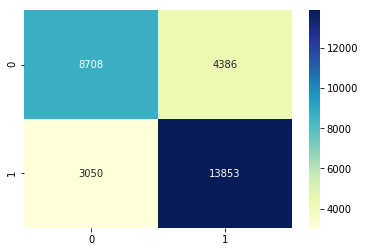

In [28]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt 
import seaborn as sns 
%matplotlib inline
# Now apply those above metrics to evaluate your model
# Your code here
print ('Accuracy:', accuracy_score(y_test, predictions))
print('Clasification Report:\n', classification_report(y_test, predictions))
cm = confusion_matrix(y_test, predictions)
sns.heatmap(cm, annot=True, fmt="d", cmap="YlGnBu")


Finally, let's run some tests :-)

In [29]:
twits = [
    "This is really bad",
    "I love this!",
    ":)",
]

preds = clf.predict_proba(twits)

for i in range(len(twits)):
    print(f'{twits[i]} --> Positive, Negative = {preds[i]}')

This is really bad --> Positive, Negative = [0.96 0.04]
I love this! --> Positive, Negative = [0.09 0.91]
:) --> Positive, Negative = [0.39 0.61]


If we would like to use the classifier in another place, or just not train it again and again everytime, we can save the model in a pickle file:

In [30]:
import pickle
import os

pickle.dump(clf, open(os.path.join('data', 'logisticRegression.pkl'), 'wb'), protocol=4)

## And you're done! I hope you liked this!